In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression



The data in the data folder has been trimmed down, but not cleaned, in order to make the file sized more manageable. 

In [30]:
df_aqi = pd.read_csv('/Users/ruitreves/Documents/py/capstone/data/aqi_data')
df_weather = pd.read_csv('/Users/ruitreves/Documents/py/capstone/data/weather_data')

/var/folders/yh/jlrr3m712273029_l_ssyy480000gn/T/ipykernel_1978/893554967.py:2: DtypeWarning: Columns (18,20,22,24,26,28,44,46,48,56,62,64,68,74,76,96,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv('/Users/ruitreves/Documents/py/capstone/data/weather_data')


In [31]:
df_aqi.head()

,Unnamed: 0,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,92787,Kentucky,1980-01-01,103,Unhealthy for Sensitive Groups,SO2,38.23158,-85.82678,Jefferson
1,92788,Kentucky,1980-01-02,135,Unhealthy for Sensitive Groups,CO,38.23158,-85.82678,Jefferson
2,92789,Kentucky,1980-01-03,45,Good,CO,38.23158,-85.82678,Jefferson
3,92790,Kentucky,1980-01-04,107,Unhealthy for Sensitive Groups,SO2,38.23158,-85.82678,Jefferson
4,92791,Kentucky,1980-01-05,62,Moderate,SO2,38.23158,-85.82678,Jefferson


There are many a few columns we don't need, and some of them have identical rows, which we also don't need.

In [32]:
'''We don't need 'Unnamed: 0', 'State Name', 'Latitude', 'Longitude', 'County Name' '''
drop_columns = ['Unnamed: 0','State Name', 'Latitude', 'Longitude', 'County Name']
df_aqi = df_aqi.drop(columns=drop_columns, axis=1)
df_aqi
#dont run this cell more than once, because it will not be able to find the columns we dropped and it will throw an error

,Date,AQI,Category,Defining Parameter
0,1980-01-01,103,Unhealthy for Sensitive Groups,SO2
1,1980-01-02,135,Unhealthy for Sensitive Groups,CO
2,1980-01-03,45,Good,CO
3,1980-01-04,107,Unhealthy for Sensitive Groups,SO2
4,1980-01-05,62,Moderate,SO2
...,...,...,...,...
14971,2020-12-27,36,Good,Ozone
14972,2020-12-28,56,Moderate,PM2.5
14973,2020-12-29,52,Moderate,PM2.5
14974,2020-12-30,48,Good,PM2.5


Now df_aqi is looking nice and clean. Lets do the name thing to df_weather.

In [33]:
df_weather.head()

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,...,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES,WV20,WV20_ATTRIBUTES
0,11688,USW00093821,1980-01-01,38.17738,-85.73077,146.3,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",0.0,",,0,2400",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11689,USW00093821,1980-01-02,38.17738,-85.73077,146.3,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",0.0,"T,,0,2400",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11690,USW00093821,1980-01-03,38.17738,-85.73077,146.3,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",18.0,",,0,2400",18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11691,USW00093821,1980-01-04,38.17738,-85.73077,146.3,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",74.0,",,0,2400",79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11692,USW00093821,1980-01-05,38.17738,-85.73077,146.3,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",0.0,"T,,0,2400",3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of columns in df_weather that we don't need. Several columns have identical rows, and we don't need this.

In [34]:
#there are fewer columns we want than that we dont want from this dataframe, so we'll do this slightly differently than before
keep_columns = ['DATE', 'TMIN', 'TMAX']
df_weather = df_weather[keep_columns]
column_names = {'DATE': 'Date', 'TMIN': 'Min Temp C', 'TMAX': 'Max Temp C'}
df_weather = df_weather.rename(columns=column_names)
df_weather


,Date,Min Temp C,Max Temp C
0,1980-01-01,-11.0,17.0
1,1980-01-02,-6.0,17.0
2,1980-01-03,0.0,11.0
3,1980-01-04,-17.0,0.0
4,1980-01-05,-72.0,-11.0
...,...,...,...
14971,2020-12-27,-16.0,144.0
14972,2020-12-28,-5.0,122.0
14973,2020-12-29,-10.0,50.0
14974,2020-12-30,22.0,150.0


In [35]:
#lets drop rows with missing values, if there are any
df_aqi = df_aqi.dropna()
df_weather = df_weather.dropna()

Something very strange about this dataset is that the temperature units are 'tenths of degrees celcius'. So for instance, -11.0 tenths of degrees celcius = -1.1 degrees celcius'. This is weird and we will change it.

In [36]:
df_weather['Min Temp C'] = df_weather['Min Temp C'] / 10
df_weather['Max Temp C'] = df_weather['Max Temp C'] / 10
df_weather


/var/folders/yh/jlrr3m712273029_l_ssyy480000gn/T/ipykernel_1978/4059373702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['Min Temp C'] = df_weather['Min Temp C'] / 10
/var/folders/yh/jlrr3m712273029_l_ssyy480000gn/T/ipykernel_1978/4059373702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['Max Temp C'] = df_weather['Max Temp C'] / 10


,Date,Min Temp C,Max Temp C
0,1980-01-01,-1.1,1.7
1,1980-01-02,-0.6,1.7
2,1980-01-03,0.0,1.1
3,1980-01-04,-1.7,0.0
4,1980-01-05,-7.2,-1.1
...,...,...,...
14971,2020-12-27,-1.6,14.4
14972,2020-12-28,-0.5,12.2
14973,2020-12-29,-1.0,5.0
14974,2020-12-30,2.2,15.0


In [37]:
#some may prefer fahrenheit so we will add columns for them
df_weather['Min Temp F'] = df_weather['Min Temp C'] * 9/5 + 32
df_weather['Max Temp F'] = df_weather['Max Temp C'] * 9/5 + 32

/var/folders/yh/jlrr3m712273029_l_ssyy480000gn/T/ipykernel_1978/4052654922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['Min Temp F'] = df_weather['Min Temp C'] * 9/5 + 32
/var/folders/yh/jlrr3m712273029_l_ssyy480000gn/T/ipykernel_1978/4052654922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['Max Temp F'] = df_weather['Max Temp C'] * 9/5 + 32


In [38]:
df_weather

,Date,Min Temp C,Max Temp C,Min Temp F,Max Temp F
0,1980-01-01,-1.1,1.7,30.02,35.06
1,1980-01-02,-0.6,1.7,30.92,35.06
2,1980-01-03,0.0,1.1,32.00,33.98
3,1980-01-04,-1.7,0.0,28.94,32.00
4,1980-01-05,-7.2,-1.1,19.04,30.02
...,...,...,...,...,...
14971,2020-12-27,-1.6,14.4,29.12,57.92
14972,2020-12-28,-0.5,12.2,31.10,53.96
14973,2020-12-29,-1.0,5.0,30.20,41.00
14974,2020-12-30,2.2,15.0,35.96,59.00


Still to do: 
1. Merge dataframes
2. virtual environment
3. readMe
4. matplotlib


In [39]:
#Now lets merge the two dataFrames on the 'Date' column
df = pd.merge(df_aqi, df_weather, on='Date')
df

,Date,AQI,Category,Defining Parameter,Min Temp C,Max Temp C,Min Temp F,Max Temp F
0,1980-01-01,103,Unhealthy for Sensitive Groups,SO2,-1.1,1.7,30.02,35.06
1,1980-01-02,135,Unhealthy for Sensitive Groups,CO,-0.6,1.7,30.92,35.06
2,1980-01-03,45,Good,CO,0.0,1.1,32.00,33.98
3,1980-01-04,107,Unhealthy for Sensitive Groups,SO2,-1.7,0.0,28.94,32.00
4,1980-01-05,62,Moderate,SO2,-7.2,-1.1,19.04,30.02
...,...,...,...,...,...,...,...,...
14966,2020-12-27,36,Good,Ozone,-1.6,14.4,29.12,57.92
14967,2020-12-28,56,Moderate,PM2.5,-0.5,12.2,31.10,53.96
14968,2020-12-29,52,Moderate,PM2.5,-1.0,5.0,30.20,41.00
14969,2020-12-30,48,Good,PM2.5,2.2,15.0,35.96,59.00


Now we need to do visualizations; maybe group aqi into intervals that span 10 degrees(50-59, 60-69, etc)

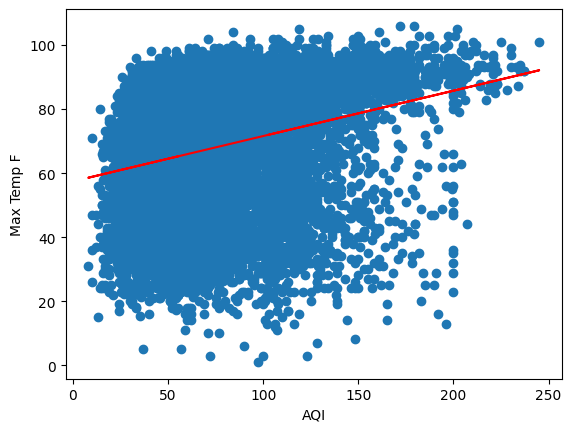

In [40]:
aqi = df['AQI'].values.reshape(-1,1)
max_temp_F = df['Max Temp F'].values

plt.scatter(aqi, max_temp_F)

model_max_temp = LinearRegression()
model_max_temp.fit(aqi, max_temp_F)

y_pred = model_max_temp.predict(aqi)

plt.plot(aqi, y_pred, color = 'red')

plt.xlabel('AQI')
plt.ylabel('Max Temp F')
plt.show()

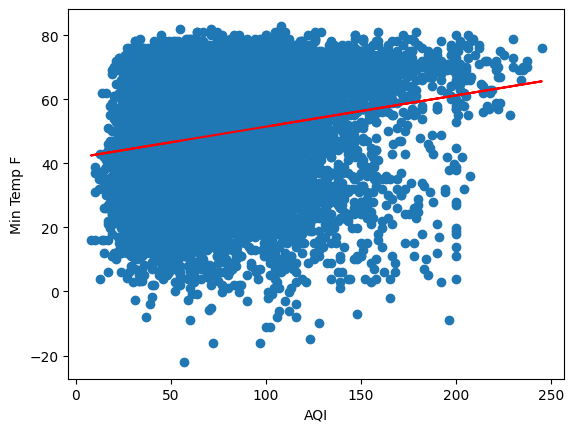

In [41]:
aqi = df['AQI'].values.reshape(-1,1)
min_temp_F = df['Min Temp F'].values

plt.scatter(aqi, min_temp_F)

model_min_temp = LinearRegression()
model_min_temp.fit(aqi, min_temp_F)

y_pred = model_min_temp.predict(aqi)

plt.plot(aqi, y_pred, color = 'red')

plt.xlabel('AQI')
plt.ylabel('Min Temp F')
plt.show()

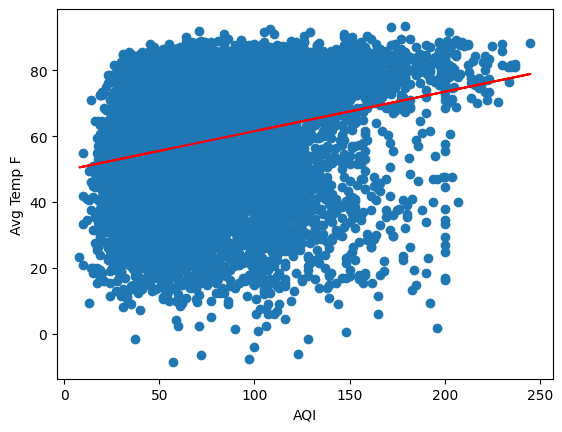

In [42]:
df['Average Temp F'] = (df['Max Temp F'] + df['Min Temp F']) / 2
avg_temp_F = df['Average Temp F']
aqi = df['AQI'].values.reshape(-1,1)


plt.scatter(aqi, avg_temp_F)

model_avg_temp = LinearRegression()
model_avg_temp.fit(aqi, avg_temp_F)

y_pred = model_avg_temp.predict(aqi)

plt.plot(aqi, y_pred, color = 'red')

plt.xlabel('AQI')
plt.ylabel('Avg Temp F')
plt.show()

These scatter plots show that in the case of both the Maximum temperature and the minimum temperature, there is a correlation between increasing temperature and increasing aqi. It follows that there would be a positive correlation between average temperature and aqi, which is shown directly above. 

In [43]:
slope_max_temp = model_max_temp.coef_[0]
slope_min_temp = model_min_temp.coef_[0]
slope_avg_temp = model_avg_temp.coef_[0]
print('Regression line slope for max temp: ' + str(slope_max_temp))
print('Regression line slope for min temp: ' + str(slope_min_temp))
print('Regression line slope for average temp: ' + str(slope_avg_temp))

Regression line slope for max temp: 0.14157865853044377
Regression line slope for min temp: 0.09771007304628043
Regression line slope for average temp: 0.11964436578836203


The slope of the line in the maximum temperature plot is slightly larger, indicating that there is a slightly stronger positive linear relationship between aqi and the maximum temperature of a given day.

January 1st, 1980 (the earliest date in our data) was a Tuesday. Perhaps there is some correlation between aqi and day of the week? Perhaps because more people commute by car during the week (monday - friday) there will be a noticable effect on aqi.

In [44]:
#lets add days of the week to our dataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Day of Week'] = df['Date'].dt.day_name()
df

,Date,AQI,Category,Defining Parameter,Min Temp C,Max Temp C,Min Temp F,Max Temp F,Average Temp F,Day of Week
0,1980-01-01,103,Unhealthy for Sensitive Groups,SO2,-1.1,1.7,30.02,35.06,32.54,Tuesday
1,1980-01-02,135,Unhealthy for Sensitive Groups,CO,-0.6,1.7,30.92,35.06,32.99,Wednesday
2,1980-01-03,45,Good,CO,0.0,1.1,32.00,33.98,32.99,Thursday
3,1980-01-04,107,Unhealthy for Sensitive Groups,SO2,-1.7,0.0,28.94,32.00,30.47,Friday
4,1980-01-05,62,Moderate,SO2,-7.2,-1.1,19.04,30.02,24.53,Saturday
...,...,...,...,...,...,...,...,...,...,...
14966,2020-12-27,36,Good,Ozone,-1.6,14.4,29.12,57.92,43.52,Sunday
14967,2020-12-28,56,Moderate,PM2.5,-0.5,12.2,31.10,53.96,42.53,Monday
14968,2020-12-29,52,Moderate,PM2.5,-1.0,5.0,30.20,41.00,35.60,Tuesday
14969,2020-12-30,48,Good,PM2.5,2.2,15.0,35.96,59.00,47.48,Wednesday


Now lets investigate the relationship between day of the week and aqi. We'll use the average aqi for each day.

In [45]:
grouped_df = df.groupby('Day of Week')['AQI'].sum().reset_index()
custom_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'Day_of_Week' to Categorical with custom order
grouped_df['Day of Week'] = pd.Categorical(grouped_df['Day of Week'], categories=custom_order, ordered=True)
#number of entries = 14,971
grouped_df = grouped_df.sort_values(by='Day of Week')

Since the number of rows in df (14,971) is not divisible by 7 (the number of days of the week), we conclude that there are not the same number of aqi entries for each of the days of the week. We need to use the number of entries for each day to calculate the average.

In [46]:
day_counts = df.groupby('Day of Week').size().reset_index()
day_counts

,Day of Week,0
0,Friday,2139
1,Monday,2137
2,Saturday,2138
3,Sunday,2137
4,Thursday,2140
5,Tuesday,2140
6,Wednesday,2140


In [47]:
#columns_names = [day_counts['Day of Week'], grouped_df['AQI'] / day_counts[0]]
grouped_df['AQI'] = grouped_df['AQI'] / day_counts[0]
grouped_df

,Day of Week,AQI
3,Sunday,68.055218
1,Monday,70.844174
5,Tuesday,71.890654
6,Wednesday,72.786916
4,Thursday,73.169626
0,Friday,73.727910
2,Saturday,71.165108


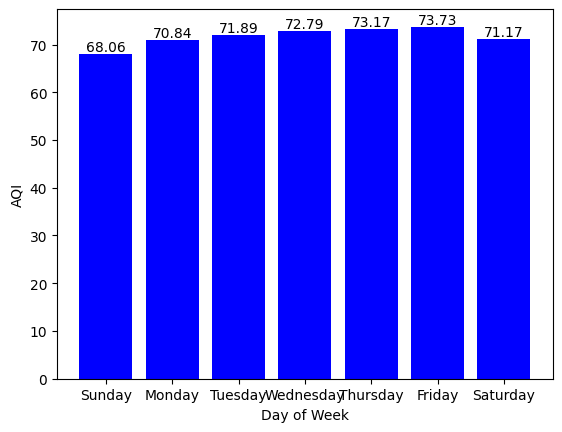

In [48]:
x_values = grouped_df['Day of Week']
y_values = grouped_df['AQI']
bars = plt.bar(x_values, y_values, color='blue')
plt.bar_label(bars, labels=y_values.round(2), fmt='%.2f', label_type='edge', color='black')
plt.xlabel('Day of Week')
plt.ylabel('AQI')
plt.show()

Now let's look at the average temperature by month compared to the aqi. Plot average temp per month per year and see if there are trends. also look at the average aqi per month per year, then do the aqi/temp comparison. 

In [49]:
df['Month'] = df['Date'].dt.month_name()
month_df = df.groupby('Month')['AQI'].mean().reset_index()
month_df



,Month,AQI
0,April,65.372358
1,August,90.486998
2,December,62.778127
3,February,66.289905
4,January,65.591660
5,July,91.360630
6,June,87.162602
7,March,63.413847
8,May,73.242329
9,November,60.709756


In [50]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_df['Month'] = pd.Categorical(month_df['Month'], categories=month_order, ordered=True)
month_df = month_df.sort_values(by='Month')
month_df

,Month,AQI
4,January,65.591660
3,February,66.289905
7,March,63.413847
0,April,65.372358
8,May,73.242329
6,June,87.162602
5,July,91.360630
1,August,90.486998
11,September,71.675896
10,October,61.394965


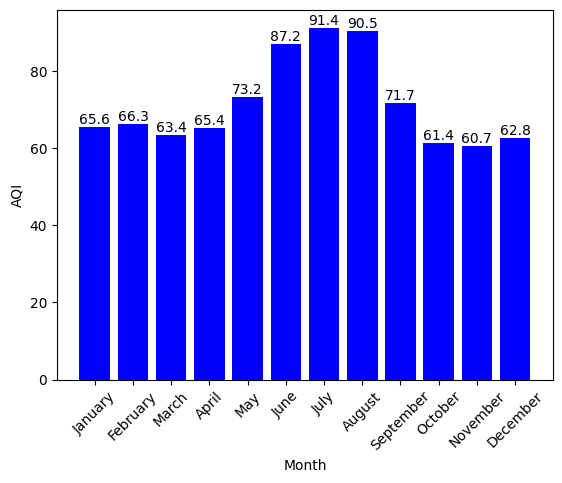

In [51]:
x_values = month_df['Month']
y_values = month_df['AQI']
bars = plt.bar(x_values, y_values, color='blue')
plt.bar_label(bars, labels=y_values.round(1), fmt='%.2f', label_type='edge', color='black')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

Notice that in the summer months, June, July, and August, the AQI peaks. Lets compare this observation with the temperature in these months.

In [52]:
month_avg_temp = df.groupby('Month')['Average Temp F'].mean().reset_index()
month_df['Average Temp F'] = month_avg_temp['Average Temp F']

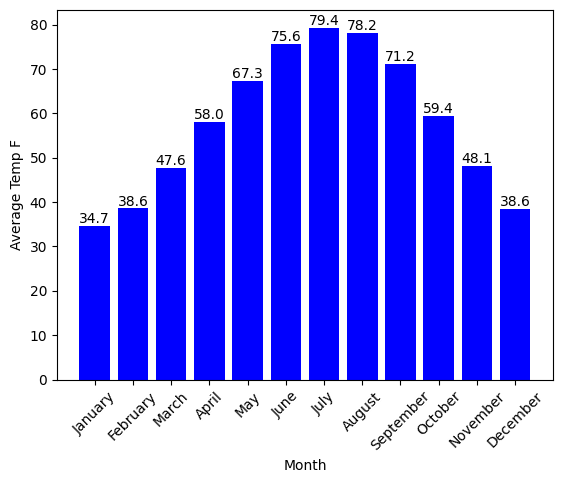

In [53]:
x_values = month_df['Month']
y_values = month_df['Average Temp F']
bars = plt.bar(x_values, y_values, color='blue')
plt.bar_label(bars, labels=y_values.round(1), fmt='%.2f', label_type='edge', color='black')
plt.xlabel('Month')
plt.ylabel('Average Temp F')
plt.xticks(rotation=45)
plt.show()

Notice how the peaks of each chart are in June, July, and August. The highest temperature are positively correlated with the highest AQI's, but there are outliers where this correlation is not present. 

So, we have observed some positive correlations between high temperatures and high AQI's, but not a perfect correlation. It appears that further investigation is needed to determine the exact relationship between these two variables, likely involving other weather variables. Let's look at a few more things just for fun. 

In [71]:
july_fourth_week = ['07-01','07-02','07-03','07-04','07-05','07-06','07-07']
july_fourth_df = df[df['Date'].dt.strftime('%m-%d').isin(july_fourth_week)]
july_fourth_df = july_fourth_df.groupby('')

,Date,AQI,Category,Defining Parameter,Min Temp C,Max Temp C,Min Temp F,Max Temp F,Average Temp F,Day of Week,Month
182,1980-07-01,133,Unhealthy for Sensitive Groups,Ozone,15.6,29.4,60.08,84.92,72.50,Tuesday,July
183,1980-07-02,221,Very Unhealthy,Ozone,21.7,35.6,71.06,96.08,83.57,Wednesday,July
184,1980-07-03,86,Moderate,CO,22.8,27.2,73.04,80.96,77.00,Thursday,July
185,1980-07-04,116,Unhealthy for Sensitive Groups,SO2,21.7,32.2,71.06,89.96,80.51,Friday,July
186,1980-07-05,161,Unhealthy,Ozone,23.3,34.4,73.94,93.92,83.93,Saturday,July
...,...,...,...,...,...,...,...,...,...,...,...
14789,2020-07-03,55,Moderate,PM2.5,22.8,33.9,73.04,93.02,83.03,Friday,July
14790,2020-07-04,103,Unhealthy for Sensitive Groups,PM2.5,22.8,34.4,73.04,93.92,83.48,Saturday,July
14791,2020-07-05,107,Unhealthy for Sensitive Groups,PM2.5,23.3,35.0,73.94,95.00,84.47,Sunday,July
14792,2020-07-06,115,Unhealthy for Sensitive Groups,Ozone,22.8,34.4,73.04,93.92,83.48,Monday,July


In [72]:
july_fourth_df['month_day'] = df['Date'].dt.strftime('%m-%d')
july_fourth_df = july_fourth_df.groupby('month_day')['AQI'].mean().reset_index()
july_fourth_df

/var/folders/yh/jlrr3m712273029_l_ssyy480000gn/T/ipykernel_1978/1032674863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_fourth_df['month_day'] = df['Date'].dt.strftime('%m-%d')


,month_day,AQI
0,07-01,83.926829
1,07-02,86.073171
2,07-03,84.219512
3,07-04,89.195122
4,07-05,86.170732
5,07-06,95.341463
6,07-07,93.048780
